# Creating a logistic regression to predict absenteeism
*) Note: **don't run all below**, this notebook divide into 2:  
A. Data Preprocessing 
B. Logistic Regression  
If want to run all below, start from those group (A or B)

In [1]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#to display max columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Project Description

In [3]:
from IPython.display import Image

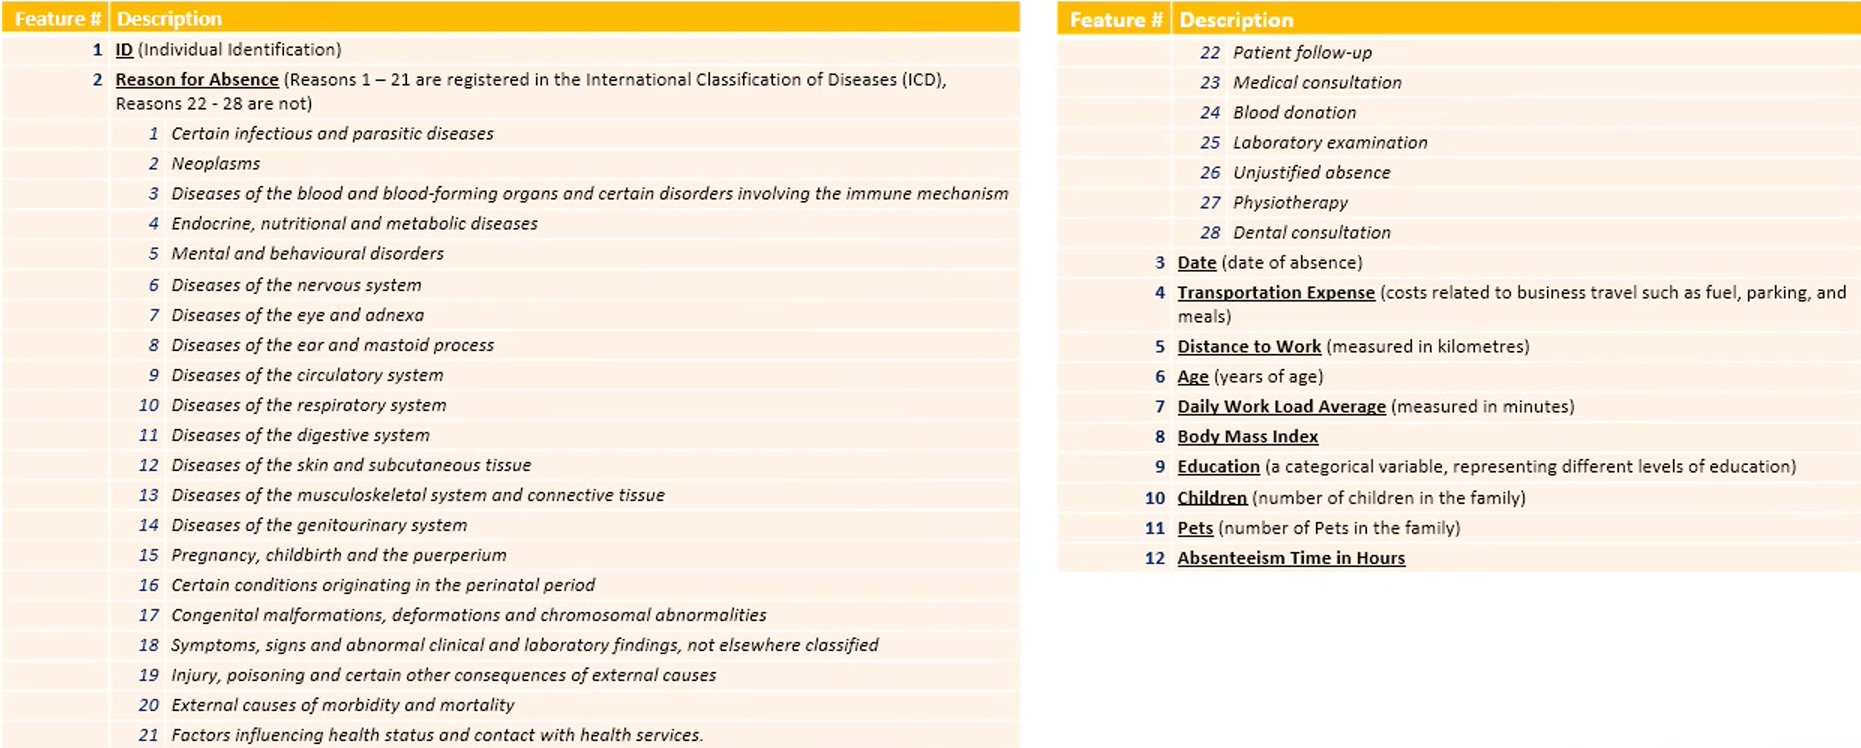

In [4]:
Image(filename = 'image/Project_description.png')

## A. Data Preprocessing

In [5]:
raw_csv_data = pd.read_csv(r'D:\Dokumen\PELATIHAN UDEMY\Data Analyst\The Data Science Course 2021 - All Resources\Part_8_Case_Study\S58_L411/Absenteeism-data.csv')

In [6]:
type(raw_csv_data)

pandas.core.frame.DataFrame

In [7]:
raw_csv_data.shape

(700, 12)

In [8]:
#copy dataset
df = raw_csv_data.copy()

In [9]:
df.sample(2)

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
514,15,23,20/10/2017,291,31,40,284.853,25,1,1,1,1
444,28,23,08/06/2017,225,26,28,253.957,24,1,1,2,4


- dependent variable (target) = Absenteeism Time in Hours
- independent variable = all columns except target

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


- Date ==> incorrect data type, need to convert it to datetime
- no null values

In [11]:
#check duplicated values
df.duplicated().sum()

8

In [12]:
#drop duplicate
df = df.drop_duplicates()

In [13]:
#check if there is any duplicated data
df.duplicated().sum()

0

In [14]:
#check missing value
df.isnull().sum()

ID                           0
Reason for Absence           0
Date                         0
Transportation Expense       0
Distance to Work             0
Age                          0
Daily Work Load Average      0
Body Mass Index              0
Education                    0
Children                     0
Pets                         0
Absenteeism Time in Hours    0
dtype: int64

No missing value

In [15]:
#ID (individual identification)
#each number of columns represent specific employee
#ID indicates precisely who has been away during working hours
#but this information will not improve our analysis to the absenteeism time
#ID is just label variable : a number that distinguish the individuals from one another,
#not to carry any numeric information, it is NOMINAL DATA
#drop id, because it is no needed
df = df.drop(['ID'], axis=1)

In [16]:
df.head(2)

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0


### Reason for Absence
- Reason for Absence in this dataset is number, but actually this number represent someone reason to not going to work, example no. 1 is for certain infectious, no. 2 is mental disorder, until no. 28 (max unique value). So it is actually **categorical data**.
- Reason for Absence **do not** have numeric meaning
- Reason for Absence is **categorical nominal**, It means that the order for this variable is not important.
- We need to convert categorical data to numeric one ==> use **One hot encoding**

In [17]:
df['Reason for Absence'].describe()

count    692.000000
mean      19.326590
std        8.365406
min        0.000000
25%       13.000000
50%       23.000000
75%       26.000000
max       28.000000
Name: Reason for Absence, dtype: float64

- Min = 0
- Max = 38
- Count row = 692

In [18]:
#show unique values in sorted way
sorted(df['Reason for Absence'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28]

In [19]:
#show sum of unique values
len(df['Reason for Absence'].unique())

28

In [20]:
df.head(2)

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0


#### One Hot Encoding
dummy variable :
- 1 if a certain categorical effect is present
- 0 if a certain categorical effect is absent  
  
we want to be certain that an individual has been absent from work because of one, and only one particular reason

In [21]:
#convert Reason for Absence to dummies 
reason_columns = pd.get_dummies(df['Reason for Absence'])

In [22]:
reason_columns.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
#check if there are missing value
#if we sum, and result 0 ==> missing value, result 1 ==> single value
reason_columns['check'] = reason_columns.sum(axis=1)

In [24]:
reason_columns.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28,check
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [25]:
#check if there are missing value
print(len(reason_columns))
print(reason_columns['check'].sum(axis = 0))

692
692


The result is same, so there is no missing value

In [26]:
#drop check column
reason_columns = reason_columns.drop(['check'], axis=1)

In [27]:
reason_columns.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


##### Why we need to drop first column?
- If someone is absent for reason 0, it means they're away for an unknown cause, and we consider this as the starting point (baseline). We're interested in understanding if specific known reasons for absence lead to excessive time away from work. So, we don't really need information about people who are away for unknown reasons. Dropping this column lets us focus on analyzing known reasons for absence.

- For the remaining columns representing reasons 1 and above, we can explain it like this: Initially, there's no specific reason for someone to be absent. If there is a reason, it's marked with a 1 under the corresponding reason number. This helps us concentrate on understanding the impact of known reasons on absenteeism.

- So if we transform reason_column 0 (no reason for absent) to one hot encode, it will convert to 1, and we don't want that, because we want to focus with value 1 - 28 (reason for absent), so that's why we drop reason_column 0

In [28]:
#to avoid dummy variable trap
#dummy variable trap refers to the situation where one predictor variable can be predicted from the others
#and may lead to multicollinearity issues
#so we excluding the first category
#create n-1 dummy variable
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first=True)

In [29]:
reason_columns.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Group the Reasons for Absence
- Grouping 'reason_columns' == **Classification**
- Classification : re-organizing a certain type of variables into groups in regression analysis
- Group = Class

In [30]:
df.head(2)

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0


In [31]:
#see all columns
df.columns.values

array(['Reason for Absence', 'Date', 'Transportation Expense',
       'Distance to Work', 'Age', 'Daily Work Load Average',
       'Body Mass Index', 'Education', 'Children', 'Pets',
       'Absenteeism Time in Hours'], dtype=object)

In [32]:
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [33]:
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16], dtype=int64)

In [34]:
reason_columns.columns.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64)

Column 'Reason for Absence' has same unique value with 'reason_columns', so to avoid multicollienarity, we drop 'Reason for Absence' column

In [35]:
df = df.drop(['Reason for Absence'], axis=1)

In [36]:
df.head(2)

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0


#### Qualitative Analysis for grouping

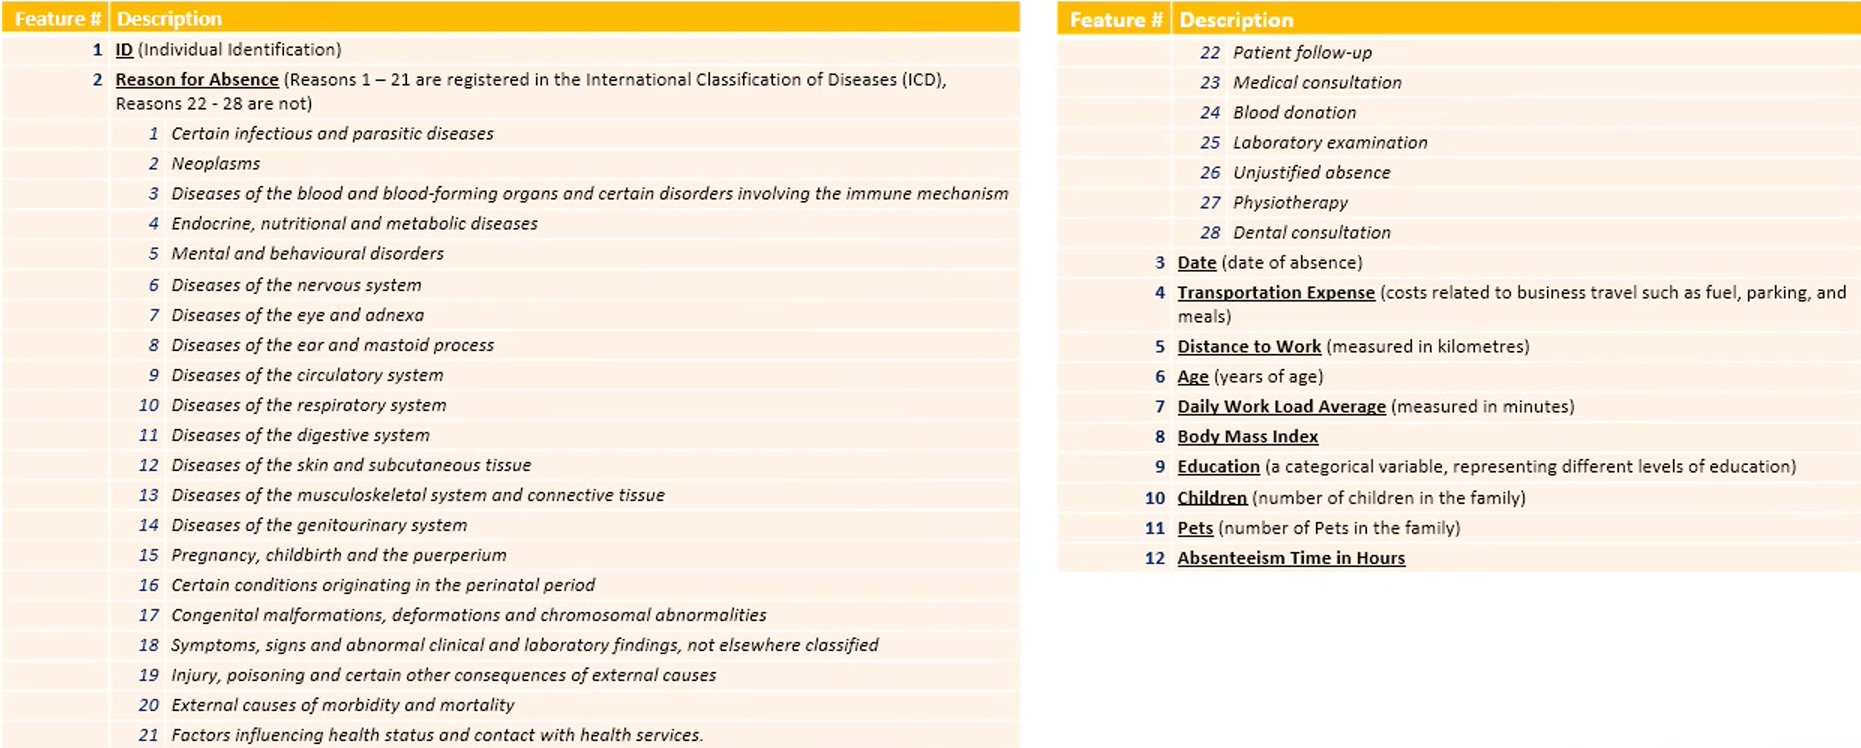

In [37]:
Image(filename = 'image/Project_description.png')

- Group 1 ==> 1 - 14 according to diseases
- Group 2 ==> 15 - 17 according to pregnancy
- Group 3 ==> 18 - 21 according to poisoning
- Group 4 ==> 22 - 28 according to light reasons for absence

In [38]:
reason_columns.head(2)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22,23,24,25,26,27,28
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [39]:
#create 4 grouping 
#select class 1-14
#.loc[:, 1:14] = select all rows (:) and columns from index 1 to 14 
#.max(axis=1): After selecting the subset of columns, the max function is applied along axis 1
# 0 ==> none of the values on the given row were equal to 1 
# 1 ==> somewhere among these 14 columns we have observed the number 1
reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)

#select class 15-17
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)

#select class 18-21
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)

#select class 22-28
reason_type_4 = reason_columns.loc[:, 22:].max(axis=1)

In [40]:
#show reason_type_1
reason_type_1[:5]

0    0
1    0
2    0
3    1
4    0
dtype: uint8

In [41]:
#show reason_type_2
reason_type_2[:5]

0    0
1    0
2    0
3    0
4    0
dtype: uint8

In [42]:
#show reason_type_3
reason_type_3[:5]

0    0
1    0
2    0
3    0
4    0
dtype: uint8

In [43]:
#show reason_type_4
reason_type_4[:5]

0    1
1    0
2    1
3    0
4    1
dtype: uint8

#### Concatenate column values

In [44]:
df.head(2)

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,14/07/2015,118,13,50,239.554,31,1,1,0,0


In [45]:
#concat df with reason_type_1 to 4
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis=1)
df.head(2)

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0


In [46]:
#show all column value
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [47]:
#rename column 0, 1, 2, 3
column_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

df.columns = column_names

df.head(2)

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Reason_1,Reason_2,Reason_3,Reason_4
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,0,0,0,1
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,0,0,0,0


#### Reorder Columns

In [48]:
column_names_reordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours']

#filter df with column_names_reordered
df = df[column_names_reordered]

df.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0


#### Create checkpoint
- Interim save of our work

In [49]:
df_reason_mod = df.copy()

df_reason_mod.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,14/07/2015,118,13,50,239.554,31,1,1,0,0


#### Date

In [50]:
#check current date type
type(df_reason_mod['Date'][0])

str

- Data type of 'Date' is string. Need to convert it to datetime with format '%d/%m/%Y'

In [51]:
df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'], format='%d/%m/%Y')

In [52]:
#check current date type
type(df_reason_mod['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [53]:
df_reason_mod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 0 to 699
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Reason_1                   692 non-null    uint8         
 1   Reason_2                   692 non-null    uint8         
 2   Reason_3                   692 non-null    uint8         
 3   Reason_4                   692 non-null    uint8         
 4   Date                       692 non-null    datetime64[ns]
 5   Transportation Expense     692 non-null    int64         
 6   Distance to Work           692 non-null    int64         
 7   Age                        692 non-null    int64         
 8   Daily Work Load Average    692 non-null    float64       
 9   Body Mass Index            692 non-null    int64         
 10  Education                  692 non-null    int64         
 11  Children                   692 non-null    int64         
 12  Pets    

#### Extract Month Value

In [65]:
df_reason_mod['Date'][0]

Timestamp('2015-07-07 00:00:00')

In [55]:
df_reason_mod['Date'][0].month

7

In [56]:
df_reason_mod.shape

(692, 14)

In [57]:
df_reason_mod.shape[0]

692

In [58]:
range(df_reason_mod.shape[0])

range(0, 692)

In [59]:
df_reason_mod.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0


In [68]:
#must to reset index
df_reason_mod = df_reason_mod.reset_index()

In [71]:
list_months = []
for i in range(df_reason_mod.shape[0]):
    list_months.append(df_reason_mod['Date'][i].month)

In [72]:
#create new column
df_reason_mod['Month Value'] = list_months

In [74]:
df_reason_mod.head(2)

,index,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value
0,0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7


#### Extract Day of Week

In [75]:
list_days = []
for i in range(df_reason_mod.shape[0]):
    list_days.append(df_reason_mod['Date'][i].weekday())

In [76]:
#create new column
df_reason_mod['Day of the Week'] = list_days

In [77]:
df_reason_mod.head(2)

,index,Reason_1,Reason_2,Reason_3,Reason_4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,0,0,0,0,1,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,1,0,0,0,0,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1


#### Drop index and Date

In [78]:
#copy dataset
df_reason_mods = df_reason_mod.copy()

In [79]:
#drop index and date
df_reason_mods = df_reason_mods.drop(['index', 'Date'], axis=1)
df_reason_mods.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Month Value,Day of the Week
0,0,0,0,1,289,36,33,239.554,30,1,2,1,4,7,1
1,0,0,0,0,118,13,50,239.554,31,1,1,0,0,7,1


In [80]:
#show column
df_reason_mods.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Month Value',
       'Day of the Week'], dtype=object)

In [81]:
#reorder column name
column_names_upd = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4',
       'Month Value', 'Day of the Week',
       'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education', 'Children',
       'Pets', 'Absenteeism Time in Hours']

In [82]:
df_reason_mods = df_reason_mods[column_names_upd]
df_reason_mods.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0


**Transportation Expense**
- Travel expenses are costs related to business travel
- Travel expenses = fuel + parking + meals + **transportation** + other
- 'Transportation Expense' is subcategory of travel expenses
- 'Transportation Expense' in this dataset is monthly transportation expenses of an individual, measured in dollars  
  
**Distance to Work**
- The kilometers an individual must travel from home to work  
  
**Daily Work Load Average**
- The average amount of time spent working per day, shown in minutes  
  
**Body Mass Index**
- Indicator for under, normal, overweight person

#### 'Education', 'Children', 'Pets'
- 'Education' is categorical data that containing integers. It doesn't have any numerical meaning
- **'Education' needs to convert into dummy variable**
- 'Children', 'Pets' are how many kids or pets a person had precisely

In [83]:
#copy dataset
df_reason_date_mod = df_reason_mods.copy()

In [85]:
df_reason_date_mod.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,1,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,1,1,0,0


In [86]:
#show unique value od education
df_reason_date_mod['Education'].unique()

array([1, 3, 2, 4], dtype=int64)

Interpretation of Education :
- 1 = high school
- 2 = graduate
- 3 = post graduate
- 4 = master / doctor  
  
Because Education is ordinal (There are levels of education), so we need to transform it to **Label Encoding**

In [87]:
#count each of unique value
df_reason_date_mod['Education'].value_counts()

1    575
3     73
2     40
4      4
Name: Education, dtype: int64

- nearly 600 workers of high school education only
- just above 100 have better degree than that
- Therefore **separating between graduate, post graduate, and master / doctor became less relevat** for this study
- It would make sense to combine these into 1 single category
  
So we grouped education :
- 0 ==> high school
- 1 ==> graduate, post graduate, and master / doctor

In [88]:
#group the education
df_reason_date_mod['Education'] = df_reason_date_mod['Education'].map({1:0,
                                                                      2:1,
                                                                      3:1,
                                                                      4:1})

In [89]:
#check if our conversion succeed
df_reason_date_mod['Education'].value_counts()

0    575
1    117
Name: Education, dtype: int64

#### Final Checkpoint

In [90]:
#copy dataset
df_preprocessed = df_reason_date_mod.copy()
df_preprocessed.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0


- Absenteeism Time in Hours =  4, it means that a worker has been absent for 4 hours
- Absenteeism Time in Hours =  0, it means that a worker has not been absent at all

In [91]:
#save to csv
#df_preprocessed.to_csv('Absenteeism_preprocessed.csv', index=False)

## B. Logistic Regression
- Logistic Regression is type of classification
- We create 2 class ==> Moderately absent, Excessively absent
- We'll take the median value of Absenteeism Time in Hours, and use it as cut-off line
- Absenteeism Time in Hours < Median ==> Moderately absent
- Absenteeism Time in Hours > Median ==> Excessively absent

In [4]:
#load data that we've already save to csv
data_preprocessed = pd.read_csv('Absenteeism_preprocessed.csv')

In [5]:
data_preprocessed.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0


### Create the target
- Our target is : Absenteeism Time in Hours
- take the median of the dataset as a cut-off line
- So the dataset will be balanced (there will be roughly equal number of 0s and 1s for the logistic regression)
- alternatively, if we had more data, we could have found other ways to deal with the issue (balancing dataset) 
- for instance, we could have assigned some arbitrary value as a cut-off line, instead of the median

In [6]:
data_preprocessed['Absenteeism Time in Hours'].unique()

array([  4,   0,   2,   8,  40,   1,   7,   3,  32,   5,  16,  24,  64,
        56,  80, 120, 112, 104,  48], dtype=int64)

In [7]:
#find the median of target (cut-off line)
data_preprocessed['Absenteeism Time in Hours'].median()

3.0

**Classes :**
- Moderately absent : <= 3hours
- Excessively absent : > 3hours
- assign 1 to anyone who has been absent > 3 hours
- that is the equivalent of taking half a day off

In [8]:
#convert Absenteeism Time > 3 = 1
#convert Absenteeism Time < 3 = 0
targets = np.where(data_preprocessed['Absenteeism Time in Hours'] > 
                   data_preprocessed['Absenteeism Time in Hours'].median(), 1, 0)

In [9]:
#add column target to dataset
data_preprocessed['Excessive Absenteeism'] = targets

In [10]:
data_preprocessed.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0


### Check Targets
- Using the median as cut-off line is "numerically stable & rigid"
- With median, we have implicitly balanced the dataset
- This will prevent our model from learning to output only 1 or only 0

In [11]:
#check if dataset is balanced (what % of targets are 1s)
(data_preprocessed['Excessive Absenteeism'].sum() / data_preprocessed.shape[0])*100

46.09826589595375

- There are 46% of target 1 (Absenteeism Time > 3 hours)
- When balancing dataset, the 2 classes doesn't need represent 50% of the sample exactly
- Usually 60:40 split will work equally well for logistic regression
- A balance of 45-55 is almost always sufficient

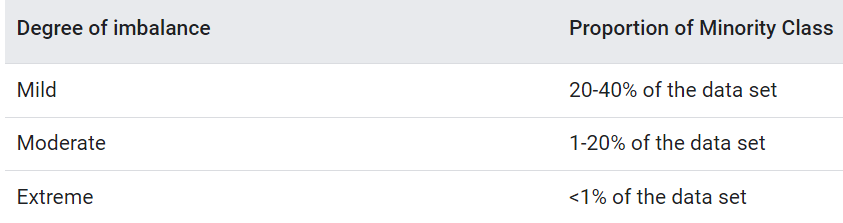

In [12]:
#source ==> https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data
Image(filename = 'image/degree of imbalance.png', width = 600)

- Based on proportion of minority class = 46% > 40%, so our handling balanced data is succeed

In [13]:
# create a checkpoint by dropping the unnecessary variables (Absenteeism Time in Hours)
data_with_targets = data_preprocessed.drop(['Absenteeism Time in Hours'], axis=1)

In [14]:
# check if the line above is a checkpoint
# if data_with_targets is data_preprocessed = True, then the two are pointing to the same object
# if it is False, then the two variables are completely different and this is in fact a checkpoint
data_with_targets is data_preprocessed

False

In [15]:
data_with_targets.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0


### Select the inputs for the regression

In [16]:
data_with_targets.shape

(692, 15)

In [17]:
#select all rows except the target (Excessive Absenteeism)
unscaled_inputs = data_with_targets.iloc[:, :-1]

In [18]:
unscaled_inputs.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0


### Standardize the data
- StandardScaler() will be used to substract the mean and divide by the standard deviation variablewise

In [19]:
# since data of different magnitude (scale) can be biased towards high values,
# we want all inputs to be of similar magnitude
#StandardScaler has much more capabilities than the straightforward 'preprocessing' method
from sklearn.preprocessing import StandardScaler

In [20]:
# check what are all columns that we've got
unscaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Month Value',
       'Day of the Week', 'Transportation Expense', 'Distance to Work',
       'Age', 'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets'], dtype=object)

In [21]:
# select the columns to omit
columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4','Education']

In [22]:
# create the columns to scale, based on the columns to omit
# use list comprehension to iterate over the list
columns_to_scale = [x for x in unscaled_inputs.columns.values if x not in columns_to_omit]

In [23]:
columns_to_scale

['Month Value',
 'Day of the Week',
 'Transportation Expense',
 'Distance to Work',
 'Age',
 'Daily Work Load Average',
 'Body Mass Index',
 'Children',
 'Pets']

In [24]:
#transform numerical value for standardization
unscaled_inputs['Month Value_std'] = StandardScaler().fit_transform(unscaled_inputs['Month Value'].values.reshape(len(unscaled_inputs),1))
unscaled_inputs['Day of the Week_std'] = StandardScaler().fit_transform(unscaled_inputs['Day of the Week'].values.reshape(len(unscaled_inputs),1))
unscaled_inputs['Transportation Expense_std'] = StandardScaler().fit_transform(unscaled_inputs['Transportation Expense'].values.reshape(len(unscaled_inputs),1))
unscaled_inputs['Distance to Work_std'] = StandardScaler().fit_transform(unscaled_inputs['Distance to Work'].values.reshape(len(unscaled_inputs),1))
unscaled_inputs['Age_std'] = StandardScaler().fit_transform(unscaled_inputs['Age'].values.reshape(len(unscaled_inputs),1))
unscaled_inputs['Daily Work Load Average_std'] = StandardScaler().fit_transform(unscaled_inputs['Body Mass Index'].values.reshape(len(unscaled_inputs),1))
unscaled_inputs['Body Mass Index_std'] = StandardScaler().fit_transform(unscaled_inputs['Distance to Work'].values.reshape(len(unscaled_inputs),1))
unscaled_inputs['Children_std'] = StandardScaler().fit_transform(unscaled_inputs['Children'].values.reshape(len(unscaled_inputs),1))
unscaled_inputs['Pets_std'] = StandardScaler().fit_transform(unscaled_inputs['Pets'].values.reshape(len(unscaled_inputs),1))

In [25]:
unscaled_inputs.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Month Value_std,Day of the Week_std,Transportation Expense_std,Distance to Work_std,Age_std,Daily Work Load Average_std,Body Mass Index_std,Children_std,Pets_std
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,0.175838,-0.685271,0.998885,0.409831,-0.529189,0.774506,0.409831,0.869872,0.260694
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0.175838,-0.685271,-1.582804,-1.147311,2.126691,1.010195,-1.147311,-0.028563,-0.594284


In [26]:
scaled_inputs = unscaled_inputs.copy()

In [27]:
#drop unscaled columns
scaled_inputs.drop(columns = columns_to_scale, inplace=True)

In [28]:
scaled_inputs = scaled_inputs.reset_index()

In [29]:
scaled_inputs.head(2)

,index,Reason_1,Reason_2,Reason_3,Reason_4,Education,Month Value_std,Day of the Week_std,Transportation Expense_std,Distance to Work_std,Age_std,Daily Work Load Average_std,Body Mass Index_std,Children_std,Pets_std
0,0,0,0,0,1,0,0.175838,-0.685271,0.998885,0.409831,-0.529189,0.774506,0.409831,0.869872,0.260694
1,1,0,0,0,0,0,0.175838,-0.685271,-1.582804,-1.147311,2.126691,1.010195,-1.147311,-0.028563,-0.594284


In [30]:
#drop column index
scaled_inputs.drop(columns='index', inplace=True)

In [31]:
scaled_inputs.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Education,Month Value_std,Day of the Week_std,Transportation Expense_std,Distance to Work_std,Age_std,Daily Work Load Average_std,Body Mass Index_std,Children_std,Pets_std
0,0,0,0,1,0,0.175838,-0.685271,0.998885,0.409831,-0.529189,0.774506,0.409831,0.869872,0.260694
1,0,0,0,0,0,0.175838,-0.685271,-1.582804,-1.147311,2.126691,1.010195,-1.147311,-0.028563,-0.594284


In [32]:
scaled_inputs.shape

(692, 14)

### Split the data into train & test and shuffle

In [33]:
#import library
from sklearn.model_selection import train_test_split

In [34]:
#split train:test dataset 80:20
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, 
                                                    targets, 
                                                    test_size = 0.2, 
                                                    random_state = 20)

In [35]:
#shape of TRAIN input & targets
print(x_train.shape, y_train.shape)

(553, 14) (553,)


In [36]:
#shape of TEST input & targets
print(x_test.shape, y_test.shape)

(139, 14) (139,)


### Modelling Logistic regression with sklearn

In [37]:
#import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

### Training the model

In [38]:
#create logistic regression
reg = LogisticRegression()

#fit train inputs
reg.fit(x_train, y_train)

LogisticRegression()

In [39]:
#train accuracy of the model
reg.score(x_train, y_train)

0.7667269439421338

- Based on the data we used, our model learned to classify 77.21% of the observation correctly

### Finding the bias / intercept (b0) and coefficients / weights (b1)

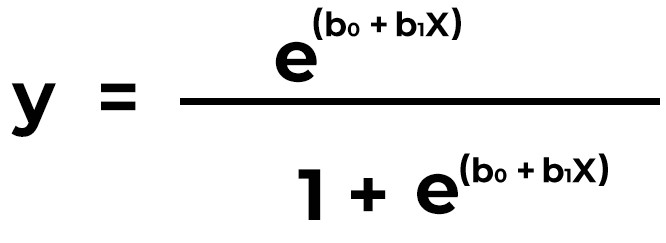

In [40]:
#function of logistic regression
Image(filename='image/logistic_function.jpg', width=300, height=10)

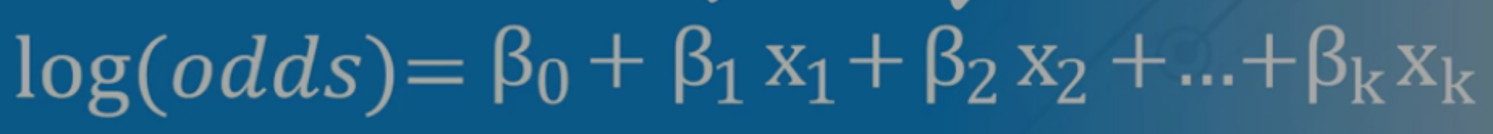

In [41]:
#function of logistic regression
Image(filename='image/logistic_formula.png', width=400, height=10)

In [42]:
#get intercept (bias) b0
reg.intercept_

array([-1.73126279])

In [43]:
#get coefficient (weights)
reg.coef_

array([[ 2.88977193,  0.82673623,  3.0181181 ,  1.02626256,  0.13373421,
         0.09547512, -0.25143608,  0.66145274, -0.02902653, -0.22776046,
         0.23852688, -0.02902653,  0.34875559, -0.35238113]])

In [44]:
#we want to select feature name
scaled_inputs.columns.values

array(['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4', 'Education',
       'Month Value_std', 'Day of the Week_std',
       'Transportation Expense_std', 'Distance to Work_std', 'Age_std',
       'Daily Work Load Average_std', 'Body Mass Index_std',
       'Children_std', 'Pets_std'], dtype=object)

In [45]:
#save feature name
feature_name = scaled_inputs.columns.values

In [46]:
#create summary_table
summary_table = pd.DataFrame(columns=['Feature name'], data = feature_name)

In [47]:
summary_table.head(2)

,Feature name
0,Reason_1
1,Reason_2


In [48]:
#add the coefficient values to the summary table
summary_table['Coefficient'] = np.transpose(reg.coef_)

In [49]:
summary_table.head(2)

,Feature name,Coefficient
0,Reason_1,2.889772
1,Reason_2,0.826736


In [50]:
#we want intercept at the top
#move index 1 step
summary_table.index = summary_table.index + 1

In [51]:
summary_table.head(2)

,Feature name,Coefficient
1,Reason_1,2.889772
2,Reason_2,0.826736


In [52]:
#add the intercept at index 0
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]

In [53]:
#sort df by index
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficient
0,Intercept,-1.731263
1,Reason_1,2.889772
2,Reason_2,0.826736
3,Reason_3,3.018118
4,Reason_4,1.026263
5,Education,0.133734
6,Month Value_std,0.095475
7,Day of the Week_std,-0.251436
8,Transportation Expense_std,0.661453
9,Distance to Work_std,-0.029027


- the closer the weights(coefficient) to 0, the smaller the weights

### Interpreting the coefficients

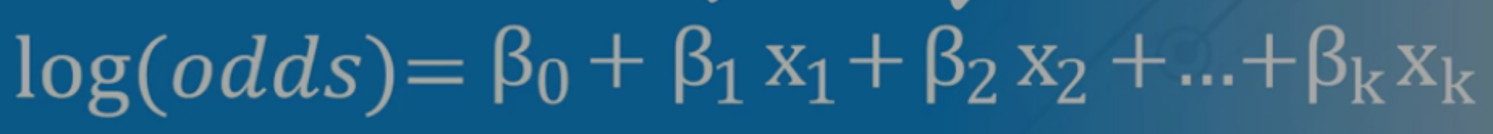

In [54]:
#function of logistic regression
Image(filename='image/logistic_formula.png', width=400, height=10)

In [55]:
#log(odds) = b0 + b1x1 + ... + bkxk
#odds = np.exp(b0 + b1x1 + ... + bkxk)
#add Odds_ratio
summary_table['Odds_ratio'] = np.exp(summary_table.Coefficient)

In [56]:
#sort the table according to odds ratio
summary_table.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
3,Reason_3,3.018118,20.452765
1,Reason_1,2.889772,17.989206
4,Reason_4,1.026263,2.790617
2,Reason_2,0.826736,2.285846
8,Transportation Expense_std,0.661453,1.937605
13,Children_std,0.348756,1.417303
11,Daily Work Load Average_std,0.238527,1.269378
5,Education,0.133734,1.143089
6,Month Value_std,0.095475,1.100181
9,Distance to Work_std,-0.029027,0.971391


A feature is **not particularly important** :
- if its coefficient is around 0 & its odds ratio is around 1  
- A weight (coefficient) of 0 implies that no matter the feature value, we will multiply it by 0 (in the model)  
- For a unit change in the standardized feature, the odds increase by a multiple equal to the odds ratio (1 = no change)
- Example odds x odds_ratio = new_odds ==> 5:1 x 1 = 5:1 (no change)  
  
 The variable that has its **coefficient is around 0 & its odds ratio is around 1** ==> **USELESS** for our model:
 - Education
 - Month Value
 - Distance to Work  
 - Body Mass Index  
  
  **Pet** is at the bottom of the table, but their weights are still far away from 0, it's indeed important.  
  Pet is continous variable, that has negative coefficient (-0.352381). Its odds is (1 - 0.703012)*100 = 29.6% lower than the base model(no pet)
   
 *) The result is kinda surprising, because they are relevant to Absenteeism, so we'll keep the features for now, and considered to drop it later on      
   
 **Interpreting the coefficient :**
 - The further away from 0 a coefficient is, the bigger its importance
 
  The highest odds_ratio that affect Absenteeism are :
 - Reason 3 (poisoning)
 - Reason 1 (diseases)
 - Reason 4 (light reasons for absence)
 - Reason 2 (pregnancy)    
     
So, the **most crucial** for excessive absence is **positioning**. The odds of someone being excessively absent after being poisoned is 20 times higher than when no reason was reported (Reason 0 ==> Baseline model)  
 
  
- **Transportation Expense** is one of our standardized variable. Its odds ratio implies that for one standardized unit or for one standard deviation increases in Transportation Expense, it is close 1.93x as likely to be excessively absent

### Backward Elimination

**Backward Elimination:**
- We can simplify our model by removing all features which have close to no contribution to the model
- When we have p-value, we get rids of all coefficient with p-values > 0.05
- But in this package sklearn, there's no p-value, so we use weight instead
- If the weight is small enough, it won't make any difference anyway
- If we remove these variables, the rest of our model should not really change in terms of coefficient values

In [57]:
data_preprocessed.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Month Value,Day of the Week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,Excessive Absenteeism
0,0,0,0,1,7,1,289,36,33,239.554,30,0,2,1,4,1
1,0,0,0,0,7,1,118,13,50,239.554,31,0,1,0,0,0


In [58]:
# drop weak impact variable
data_with_targets2 = data_preprocessed.drop(['Absenteeism Time in Hours', 
                                             'Month Value', 
                                             'Distance to Work', 
                                             'Education', 
                                             'Body Mass Index'], axis=1)

In [59]:
#select all rows except the target (Excessive Absenteeism)
unscaled_inputs2 = data_with_targets2.iloc[:, :-1]

In [60]:
unscaled_inputs2.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Day of the Week,Transportation Expense,Age,Daily Work Load Average,Children,Pets
0,0,0,0,1,1,289,33,239.554,2,1
1,0,0,0,0,1,118,50,239.554,1,0


In [61]:
# select the columns to omit
columns_to_omit = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason_4']

# create the columns to scale, based on the columns to omit
# use list comprehension to iterate over the list
columns_to_scale2 = [x for x in unscaled_inputs2.columns.values if x not in columns_to_omit]

columns_to_scale2

['Day of the Week',
 'Transportation Expense',
 'Age',
 'Daily Work Load Average',
 'Children',
 'Pets']

In [62]:
#transform numerical value for standardization
unscaled_inputs2['Day of the Week_std'] = StandardScaler().fit_transform(unscaled_inputs2['Day of the Week'].values.
                                                                     reshape(len(unscaled_inputs2),1))
unscaled_inputs2['Transportation Expense_std'] = StandardScaler().fit_transform(unscaled_inputs2['Transportation Expense'].values.
                                                                     reshape(len(unscaled_inputs2),1))
unscaled_inputs2['Age_std'] = StandardScaler().fit_transform(unscaled_inputs2['Age'].values.
                                                                     reshape(len(unscaled_inputs2),1))
unscaled_inputs2['Daily Work Load Average_std'] = StandardScaler().fit_transform(unscaled_inputs2['Daily Work Load Average'].values.
                                                                     reshape(len(unscaled_inputs2),1))
unscaled_inputs2['Children_std'] = StandardScaler().fit_transform(unscaled_inputs2['Children'].values.
                                                                     reshape(len(unscaled_inputs2),1))
unscaled_inputs2['Pets_std'] = StandardScaler().fit_transform(unscaled_inputs2['Pets'].values.
                                                                     reshape(len(unscaled_inputs2),1))

In [63]:
scaled_inputs2 = unscaled_inputs2.copy()

In [64]:
scaled_inputs2.head(2)

,Reason_1,Reason_2,Reason_3,Reason_4,Day of the Week,Transportation Expense,Age,Daily Work Load Average,Children,Pets,Day of the Week_std,Transportation Expense_std,Age_std,Daily Work Load Average_std,Children_std,Pets_std
0,0,0,0,1,1,289,33,239.554,2,1,-0.685271,0.998885,-0.529189,-0.803696,0.869872,0.260694
1,0,0,0,0,1,118,50,239.554,1,0,-0.685271,-1.582804,2.126691,-0.803696,-0.028563,-0.594284


In [65]:
columns_to_scale2 = ['Day of the Week', 'Transportation Expense', 'Age', 'Daily Work Load Average', 'Children', 'Pets']

In [66]:
#drop unscaled columns
scaled_inputs2.drop(columns = columns_to_scale2, inplace=True)

In [67]:
scaled_inputs2 = scaled_inputs2.reset_index()

In [68]:
#drop column index
scaled_inputs2.drop(columns='index', inplace=True)

In [69]:
#split train:test dataset 80:20
x_train2, x_test2, y_train2, y_test2 = train_test_split(scaled_inputs2, 
                                                    targets, 
                                                    test_size = 0.2, 
                                                    random_state = 20)

In [70]:
#create logistic regression
reg2 = LogisticRegression()

#fit train inputs
reg2.fit(x_train2, y_train2)

LogisticRegression()

In [71]:
#save feature name
feature_name2 = scaled_inputs2.columns.values

In [72]:
#create summary_table
summary_table2 = pd.DataFrame(columns=['Feature name'], data = feature_name2)

#add the coefficient values to the summary table
summary_table2['Coefficient'] = np.transpose(reg2.coef_)

#we want intercept at the top
#move index 1 step
summary_table2.index = summary_table2.index + 1

#add the intercept at index 0
summary_table2.loc[0] = ['Intercept', reg2.intercept_[0]]

summary_table2 = summary_table2.sort_index()

In [73]:
#log(odds) = b0 + b1x1 + ... + bkxk
#odds = np.exp(b0 + b1x1 + ... + bkxk)
#add Odds_ratio
summary_table2['Odds_ratio'] = np.exp(summary_table2.Coefficient)

#sort the table according to odds ratio
summary_table2.sort_values('Odds_ratio', ascending=False)

,Feature name,Coefficient,Odds_ratio
3,Reason_3,2.981395,19.715293
1,Reason_1,2.857089,17.410779
4,Reason_4,1.021754,2.778064
2,Reason_2,0.748940,2.114757
6,Transportation Expense_std,0.658673,1.932226
9,Children_std,0.301048,1.351275
8,Daily Work Load Average_std,-0.039780,0.961001
7,Age_std,-0.113538,0.892670
5,Day of the Week_std,-0.269961,0.763409
10,Pets_std,-0.340190,0.711635


In [74]:
#train accuracy of the model
reg2.score(x_train2, y_train2)

0.7540687160940326

- Before we drop weak impact variable, our model accuracy is 0.7667
- After we drop weak impact variable, our model accuracy is 0.7540
- It means that those variable we drop is useless, because the result is slightly different

## Testing the model

In [75]:
#test accuracy of the model
reg2.score(x_test2, y_test2)

0.7697841726618705

- Based on data the model has never seen before, 76% of the cases the model will predict if a person is going to be excessively absent

In [76]:
#predicted probabilities of each class
predicted_proba = reg2.predict_proba(x_test2)

In [79]:
#the first column shows the probability of a particular observation to be 0, while the second one - to be 1
predicted_proba[:5]

array([[0.76641015, 0.23358985],
       [0.2152193 , 0.7847807 ],
       [0.78209719, 0.21790281],
       [0.81476885, 0.18523115],
       [0.6247479 , 0.3752521 ]])

In [80]:
predicted_proba.shape

(139, 2)

In [81]:
#select ONLY the probabilities referring to 1s
predicted_proba[:,1]

array([0.23358985, 0.7847807 , 0.21790281, 0.18523115, 0.3752521 ,
       0.74714818, 0.6484993 , 0.5180783 , 0.22923301, 0.33869038,
       0.2629784 , 0.25526151, 0.88092397, 0.76323703, 0.94951365,
       0.19554542, 0.30722787, 0.27114314, 0.19208693, 0.19511164,
       0.59859762, 0.3019068 , 0.30554176, 0.41547952, 0.75174346,
       0.2332487 , 0.81911891, 0.20304816, 0.20537478, 0.17299906,
       0.29887115, 0.49247104, 0.23668651, 0.74897706, 0.89566182,
       0.92898847, 0.87931957, 0.27873018, 0.24802084, 0.19355043,
       0.80207258, 0.14014017, 0.66826188, 0.1689573 , 0.78349599,
       0.33091091, 0.40300886, 0.70426406, 0.4773691 , 0.77624665,
       0.35360476, 0.80003315, 0.29314017, 0.22923301, 0.22140359,
       0.63188404, 0.16217497, 0.46420713, 0.87604426, 0.59042201,
       0.2291019 , 0.37627853, 0.30277722, 0.43297891, 0.19645985,
       0.29181334, 0.52456521, 0.76297504, 0.90441019, 0.82925104,
       0.8279056 , 0.70568159, 0.0706471 , 0.88505711, 0.95534

## Save the model

In [82]:
import pickle

In [85]:
#pickle the model file
with open('model.pkl', 'wb') as file:
    pickle.dump(reg2, file)